In [3]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("../../data/clean/mbti_4.csv")
data

,type,is_E,is_N,is_F,is_J,posts,cleans,com_stmt,pos_stmt,neg_stmt,...,xd,ya,yep,yesterday,yet,young,younger,youtub,yup,zone
0,INFP,0,1,1,0,"'probably chiming in real late, but if he's an...",probabl chime real late enfp least much extrov...,0.9994,0.161,0.098,...,0,0,0,1,0,1,0,0,0,0
1,INFP,0,1,1,0,'I really like the way you put that. It makes ...,realli like way put make lot sens especi drama...,0.9918,0.116,0.094,...,0,0,0,1,2,0,0,1,0,0
2,INFP,0,1,1,0,'I thought this article was very enlightening....,thought articl veri enlighten basic assert nat...,0.9998,0.201,0.077,...,0,0,1,0,1,0,0,1,0,0
3,INFP,0,1,1,0,'I am an INFP and that sounds way too stereoty...,infp sound way stereotyp becom want without ne...,0.9998,0.186,0.065,...,0,0,0,1,0,0,2,0,0,0
4,INFP,0,1,1,0,"'I don't really relate to most of it, to be ho...",realli relat honest sensit sound realli realli...,0.9996,0.140,0.051,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,ENFJ,1,1,1,1,'Hey all! Jeez I'm still having laptop issues!...,hey jeez still laptop issu jawz alway prefer n...,0.9996,0.172,0.079,...,0,0,1,0,0,0,1,0,0,0
620,ENFJ,1,1,1,1,'One of my biggest turn-off's and I think its ...,one biggest turn think enfj thing exclud peopl...,0.9999,0.212,0.058,...,0,0,0,0,0,0,0,0,1,0
621,ENFJ,1,1,1,1,"'Dear Universe, We had a fight last night. B...",dear univers fight last night think communic p...,0.9997,0.202,0.097,...,0,0,0,0,0,0,0,0,0,0
622,ENFJ,1,1,1,1,"'Hm, I think it's been a bit too long since I ...",hm think bit long sinc first saw seri recal ge...,0.9999,0.227,0.069,...,0,0,0,0,1,0,0,0,0,0


In [4]:
#only one row contains Nan value, removed that row
data.dropna(inplace=True)

<AxesSubplot:xlabel='word_count', ylabel='Count'>

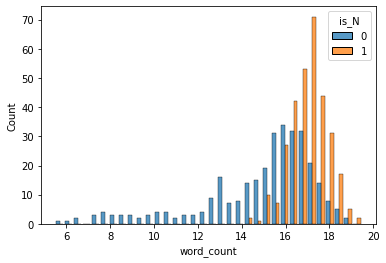

In [5]:
#word count
sns.histplot(data=data, x="word_count", hue="is_N", multiple="dodge", shrink=.8)

In [12]:
#train / test split and feature / target selection
train, test = train_test_split(data, test_size = 0.1, random_state=88, stratify=data.type)
features = ['com_stmt', 'pos_stmt', 'neg_stmt', 'neu_stmt', 'word_count',
            'unique_count', 'emoji_count', 'qe_mark', 'ex_mark', 'el_mark',
            'upper_count', 'url_count', 'img_count']
X_train, y_train = train[features], train['is_N']
X_test, y_test = test[features], test['is_N']
X_train_2, X_test_2 = train.iloc[:, 7:], test.iloc[:, 7:]
cv = KFold(n_splits=5,random_state=88,shuffle=True)

In [13]:
#logistic regression
import statsmodels.formula.api as smf
# Fit the logistic regression model
logreg = smf.logit(formula = 'is_N ~ com_stmt + pos_stmt + neg_stmt + neu_stmt \
+ word_count + unique_count + emoji_count + qe_mark + ex_mark + el_mark + \
upper_count + url_count + img_count', data = train).fit()

y_prob = logreg.predict(test)
y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob], index=y_prob.index)

model_logreg_acc = sum(y_pred == y_test) / len(test)#calcuate logistic accuracy accuracy
print(f'Logistic Regression Test Accuracy: {model_logreg_acc:.4f}')

Optimization terminated successfully.
         Current function value: 0.470499
         Iterations 9
Logistic Regression Test Accuracy: 0.7778


In [14]:
#logreg model summary
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   is_N   No. Observations:                  561
Model:                          Logit   Df Residuals:                      547
Method:                           MLE   Df Model:                           13
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.3212
Time:                        19:28:16   Log-Likelihood:                -263.95
converged:                       True   LL-Null:                       -388.85
Covariance Type:            nonrobust   LLR p-value:                 7.013e-46
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -71.9535    212.173     -0.339      0.735    -487.804     343.897
com_stmt         1.2496      0.643      1.943      0.052      -0.011       2.510
pos_stmt        42.4884    212.110      0.200      0.841    -373.239     458.216
neg_stmt        44.5165    211.659      0.210      0.833    -370.327     459.360
neu_stmt        46.0056    212.037      0.217      0.828    -369.579     461.590
word_count       0.9897      0.138      7.183      0.000       0.720       1.260
unique_count     1.3365      0.252      5.298      0.000       0.842       1.831
emoji_count      0.6177      4.238      0.146      0.884      -7.689       8.924
qe_mark          0.9772      2.007      0.487      0.626      -2.956       4.911
ex_mark          0.1222      0.967      0.126      0.899      -1.774       2.018
el_mark         -0.1785      1.602     -0.111      0.911      -3.319       2.962
upper_count     -1.0194      0.466     -2.189      0.029      -1.932      -0.107
url_count        4.9013      8.584      0.571      0.568     -11.922      21.725
img_count       -1.4256     13.200     -0.108      0.914     -27.297      24.446
================================================================================
"""

In [15]:
#logreg auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
model_logreg_auc = roc_auc#Calculate logistic AUC
print(f'Logistic Regression Test AUC: {model_logreg_auc:.4f}')

Confusion Matrix : 
 [[20 11]
 [ 3 29]]
Logistic Regression Test AUC: 0.8165


In [16]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=88).fit(X_train_2, y_train)
y_pred_rf = rf.predict(X_test_2)
model_rf_acc = sum(y_pred_rf == y_test) / len(y_test) #TODO: calculate random forest accuracy
print(f'Random Forest Test Accuracy: {model_rf_acc:.4f}')

Random Forest Test Accuracy: 0.7143


In [17]:
#cross validation random forest to find best max_feature
grid_values = {'max_features': np.linspace(1,100,100, dtype='int32'),
               'random_state': [88]}
rf2 = RandomForestClassifier(random_state=88)
cv = KFold(n_splits=5,random_state=88,shuffle=True)
rf2_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='accuracy', cv=cv, verbose=1)
rf2_cv.fit(X_train_2, y_train)
y_pred_rf2 = rf2_cv.best_estimator_.predict(X_test_2)
model_rf2_acc = sum(y_pred_rf2 == y_test) / len(y_test) # TODO: Calculate RF accuracy
print(f'CV Random Forest Test Accuracy: {model_rf2_acc:.4f}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CV Random Forest Test Accuracy: 0.7619


In [18]:
rf2_df = pd.DataFrame(rf2_cv.cv_results_)[['param_max_features', 'mean_test_score']]
rf2_df = rf2_df.set_index('param_max_features')
rf2_df

,mean_test_score
param_max_features,
1,0.602497
2,0.646950
3,0.648815
4,0.639823
5,0.709339
...,...
96,0.796792
97,0.791530
98,0.777181


In [19]:
rf2_df[:50]

,mean_test_score
param_max_features,
1,0.602497
2,0.646950
3,0.648815
4,0.639823
5,0.709339
6,0.702244
7,0.702276
8,0.696966
9,0.700569


<AxesSubplot:xlabel='param_max_features'>

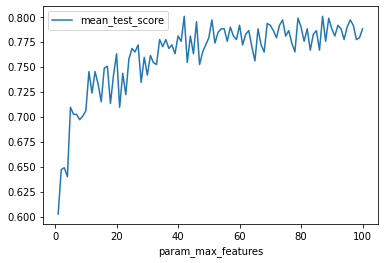

In [20]:
#update the plot**
sns.lineplot(data=rf2_df)


In [21]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=3300, max_leaf_nodes=10,
                                 random_state=88).fit(X_train_2, y_train)
y_pred_gbc = gbc.predict(X_test_2)
model_gbc_acc = sum(y_pred_gbc == y_test) / len(y_test)# Calculate boosting accuracy
print(f'GBC Test Accuracy: {model_gbc_acc:.4f}')

GBC Test Accuracy: 0.8095


In [22]:
#Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(random_state=88).fit(X_train_2, y_train)
#abc_grid = {'base_estimator' : ['gini', 'entropy'],
#            'algorithm' : ['SAMME', 'SAMME.R'],
#            'n_estimators' : [1],
#            'learning_rate' : np.linspace(0.1, 1, 10)
#            }
#abc_search = GridSearchCV(abc, param_grid=abc_grid, cv=cv, scoring='accuracy', n_jobs=-1).fit(X_train_2, y_train)
y_pred_abc = abc.predict(X_test_2)
model_abc_acc = sum(y_pred_abc == y_test) / len(y_test)
print(f'ABC Test Accuracy: {model_abc_acc:.4f}')
#print(abc_search.best_score_)
#abc_best = abc_search.best_estimator_

ABC Test Accuracy: 0.8095


In [23]:
#Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(random_state=88)
sgdc_grid = {"loss": ["hinge"],
             "penalty": ["l1", "l2"],
             "alpha": np.linspace(0.0001,0.0005,5)}
sgdc_search = GridSearchCV(sgdc, param_grid=sgdc_grid, cv=cv, scoring='accuracy', n_jobs=-1).fit(X_train_2, y_train)
#y_pred_sgdc = sgdc.predict(X_test_2)
#model_sgdc_acc = sum(y_pred_sgdc == y_test) / len(y_test)
print(sgdc_search.best_score_)
sgdc_best = sgdc_search.best_estimator_

0.7540139064475346


In [24]:
#Support Vector Classifier
from sklearn.svm import SVC
svc = SVC(C=0.1).fit(X_train_2, y_train)
y_pred_svc = svc.predict(X_test_2)
model_svc_acc = sum(y_pred_svc == y_test) / len(y_test)
print(f'SVC Test Accuracy: {model_svc_acc:.4f}')

SVC Test Accuracy: 0.7143


In [25]:
#Grid-Search 5-Cross-Validation Support Vector Classifier (took too long to run)
from sklearn.svm import SVC
svc = SVC(random_state=88, probability=True)
svc_grid = {"kernel": ["rbf"],
             "gamma": [0.5]
             }
svc_search = GridSearchCV(svc, param_grid=svc_grid, cv=cv, scoring='accuracy', n_jobs=-1).fit(X_train_2, y_train)
#y_pred_sgdc = sgdc.predict(X_test_2)
#model_sgdc_acc = sum(y_pred_sgdc == y_test) / len(y_test)
print(svc_search.best_score_)
svc_best = svc_search.best_estimator_

0.4813211125158028


In [26]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
#Elbow method to find optimal k
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_2, y_train)
    pred_i = knn.predict(X_test_2)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

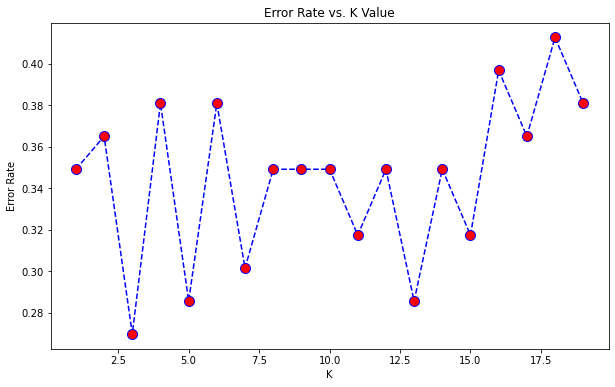

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle ='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
#The plot shows the optimal n_neighbors=9

In [28]:
#Grid-Search 5Fold-Cross-Validation K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=9)
knn_grid = {'algorithm' : ['ball_tree', 'kd_tree', 'brute', 'auto'],
            'leaf_size' : [5, 10, 20, 30],
            }
knn_search = GridSearchCV(knn, param_grid=knn_grid, cv=cv, scoring='accuracy', n_jobs=-1).fit(X_train_2, y_train)
print(knn_search.best_score_)
knn_best = knn_search.best_estimator_

0.6613147914032869


In [29]:
#LDA Classifier with all 16 types
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
y_train_2, y_test_2 = train['type'], test['type']
lda = LinearDiscriminantAnalysis().fit(X_train_2, y_train_2)
model_lda_acc = lda.score(X_test_2, y_test_2)# Calculate LDA accuracy
print(f'LDA Test Accuracy: {model_lda_acc:.4f}')

LDA Test Accuracy: 0.3016


In [30]:
#
models_result = pd.DataFrame({
    'Model':['Logistic Regression', 'Simple Random Forest', 'Random Forest', 'Simple Gradient Boosting', 'Simple AdaBoost', 'Stochastic Gradient Descent', 'Simple Support Vector Classifier', 'K-Nearest Neighbors', 'LDA-16types'],
    'Accuracy':[model_logreg_acc,  model_rf_acc, model_rf2_acc, model_gbc_acc, model_abc_acc, sgdc_search.best_score_, svc_search.best_score_, knn_search.best_score_, model_lda_acc]})